In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-faces/afhq/val/dog/flickr_dog_000254.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_000322.jpg
/kaggle/input/animal-faces/afhq/val/dog/flickr_dog_000812.jpg
/kaggle/input/animal-faces/afhq/val/dog/flickr_dog_000737.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_002383.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_001654.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_001290.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_000646.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_002199.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_003448.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_003776.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_000311.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_003489.jpg
/kaggle/input/animal-faces/afhq/val/dog/flickr_dog_000468.jpg
/kaggle/input/animal-faces/afhq/val/dog/flickr_dog_000626.jpg
/kaggle/input/animal-faces/afhq/val/dog/pixabay_dog_000971.j

In [36]:
from PIL import Image

In [37]:
image_cat = Image.open("/kaggle/input/animal-faces/afhq/train/cat/flickr_cat_000003.jpg")
image_dog = Image.open("/kaggle/input/animal-faces/afhq/train/dog/flickr_dog_000004.jpg")
image_wild = Image.open("/kaggle/input/animal-faces/afhq/train/wild/flickr_wild_000007.jpg")

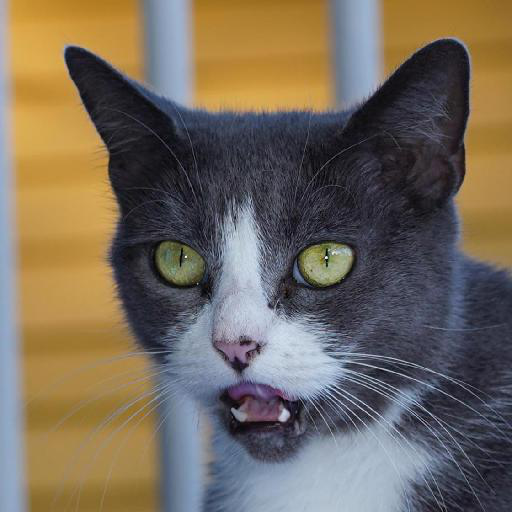

In [38]:
image_cat

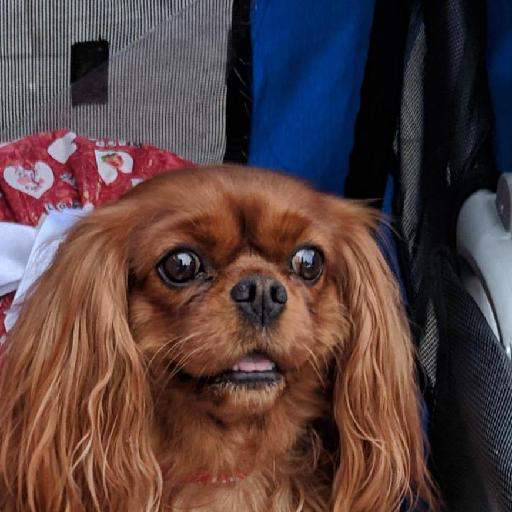

In [39]:
image_dog

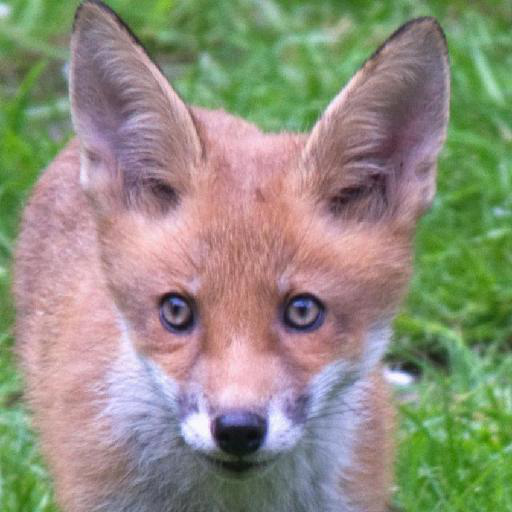

In [40]:
image_wild

In [41]:
import tensorflow as tf 

In [42]:
train_data = tf.keras.utils.image_dataset_from_directory("/kaggle/input/animal-faces/afhq/train",
                                                        seed = 123, shuffle = True, image_size = (224,224),
                                                        batch_size = 50)

Found 14630 files belonging to 3 classes.


In [43]:
test_data = tf.keras.utils.image_dataset_from_directory("/kaggle/input/animal-faces/afhq/val",
                                                       seed = 123, shuffle = True, image_size =(224,224),
                                                       batch_size = 50)

Found 1500 files belonging to 3 classes.


In [44]:
class_labels = train_data.class_names
class_labels

['cat', 'dog', 'wild']

from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense

model = VGG16(input_shape=(224,224,3), pooling=(3,3), classes=1000, classifier_activation='softmax' )
#model.add(Dense(196, activation="softmax", name="output"))
#tf.keras.layers.Dense(3, activation = "sigmoid")
model.summary()

## VGG-16 Network

In [45]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [109]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 56, 56, 256)     

In [104]:
!pip install visualkeras
import visualkeras

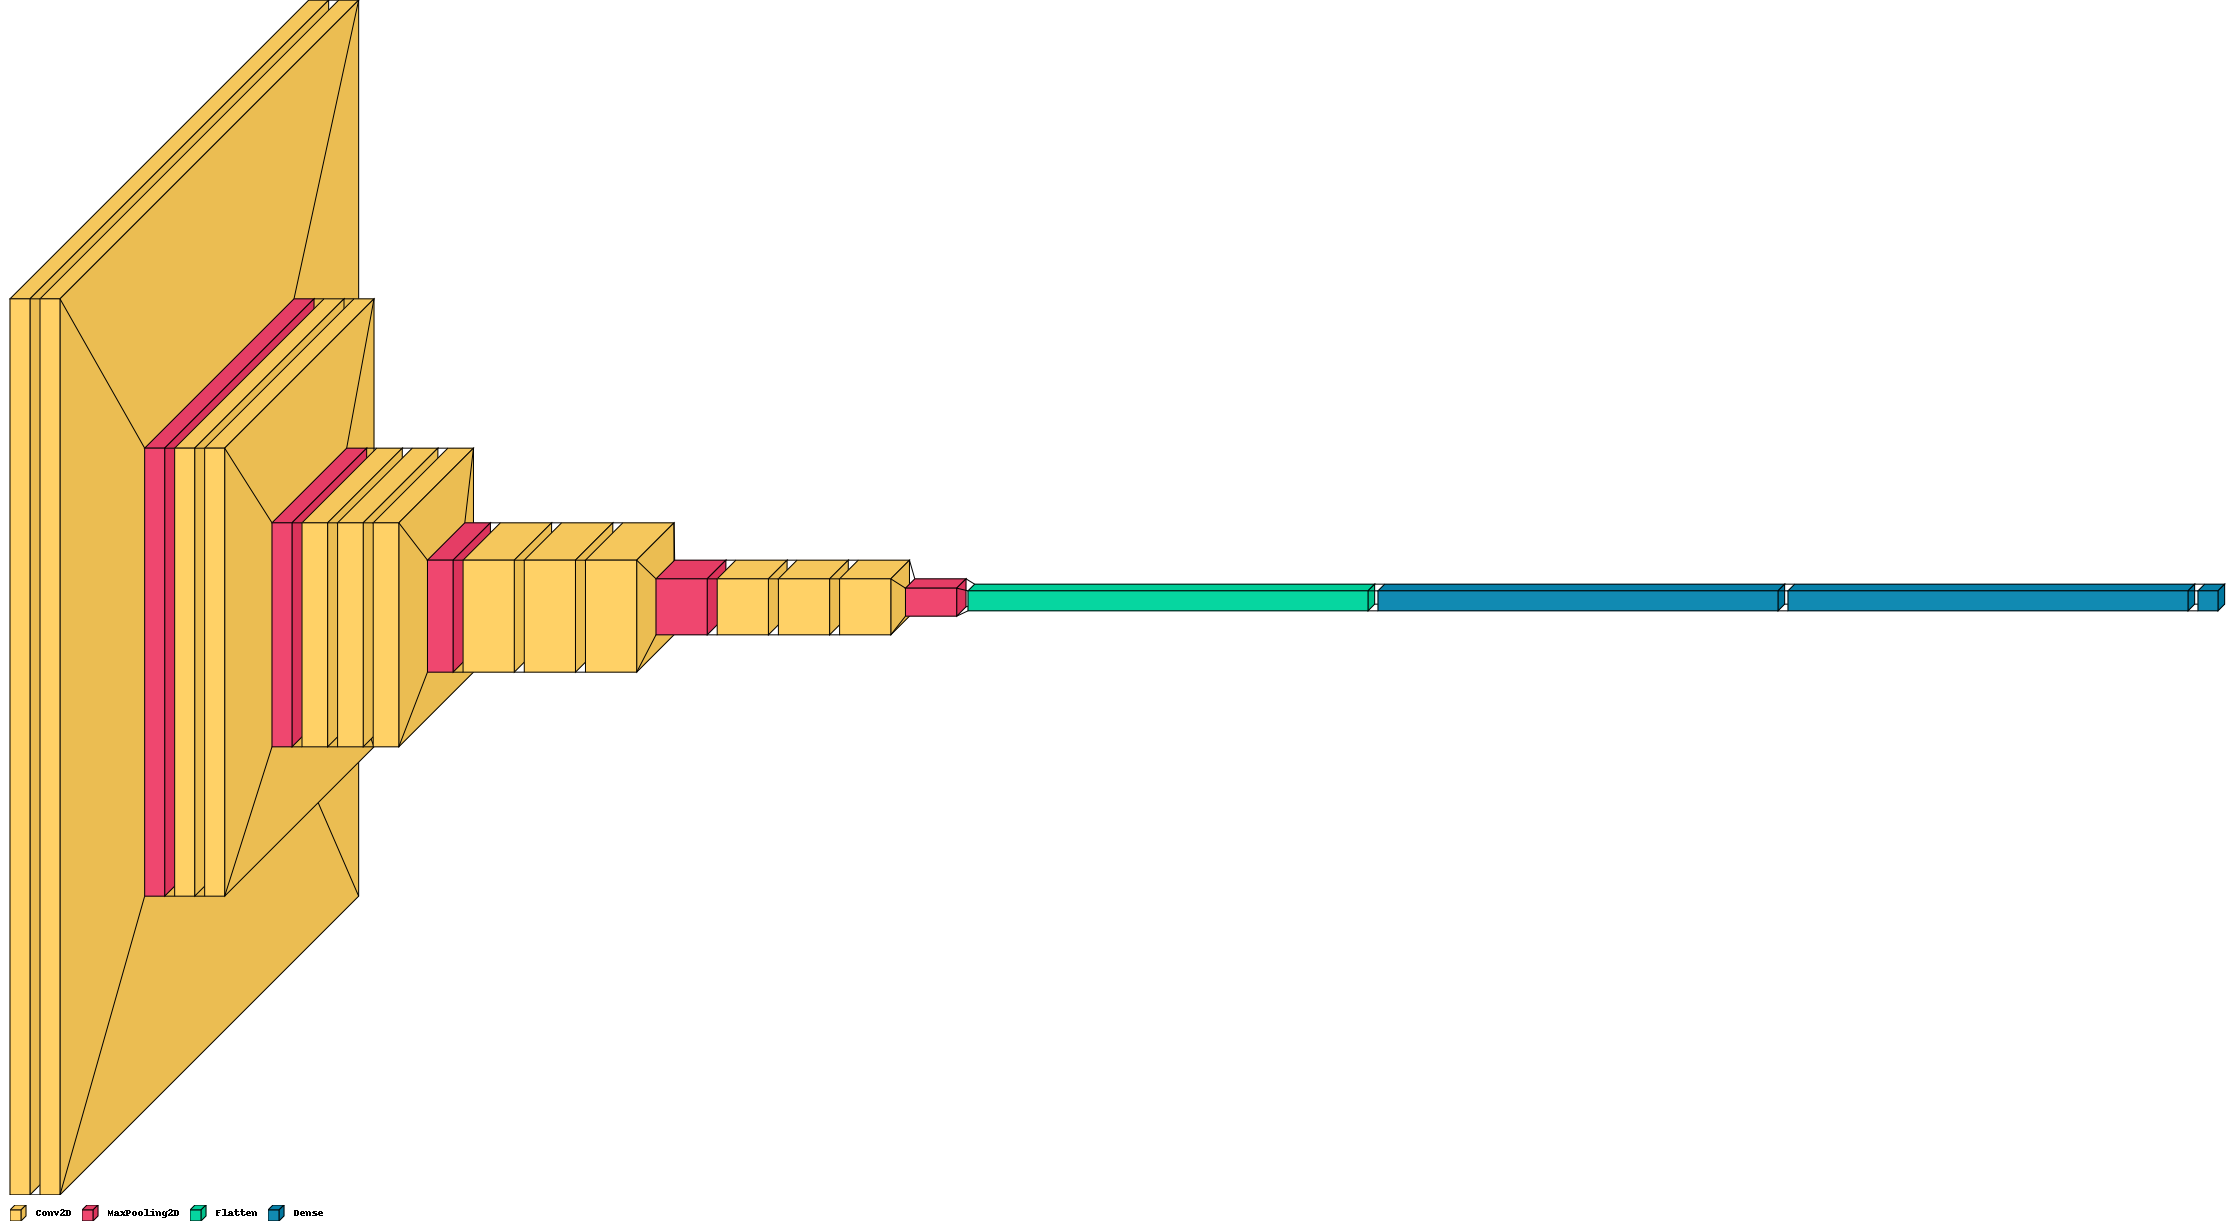

In [110]:
visualkeras.layered_view(model, legend=True) # without custom font

In [111]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [112]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [113]:
history = model.fit(train_data, steps_per_epoch=50, validation_data= test_data, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
50/50 [==============================] - 43s 836ms/step - loss: 276.5755 - accuracy: 0.3492 - val_loss: 1.0986 - val_accuracy: 0.3400
Epoch 2/100
50/50 [==============================] - 39s 791ms/step - loss: 1.0975 - accuracy: 0.3588 - val_loss: 1.0984 - val_accuracy: 0.3420
Epoch 3/100
50/50 [==============================] - 40s 805ms/step - loss: 1.1878 - accuracy: 0.3572 - val_loss: 1.1060 - val_accuracy: 0.3160
Epoch 4/100
50/50 [==============================] - 39s 790ms/step - loss: 1.1307 - accuracy: 0.3412 - val_loss: 1.0979 - val_accuracy: 0.3220
Epoch 5/100
50/50 [==============================] - 39s 784ms/step - loss: 1.1860 - accuracy: 0.3256 - val_loss: 1.1064 - val_accuracy: 0.3280
Epoch 6/100
50/50 [==============================] - 34s 677ms/step - loss: 1.1062 - accuracy: 0.3596 - val_loss: 1.0986 - val_accuracy: 0.3580


I don't like the result. There is a problem. 

I try my CNN model

In [114]:
model = Sequential()

tf.keras.layers.Rescaling(1.0/255)
model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(4800,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2400,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 222, 222, 128)     3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 128)     512       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 109, 109, 64)      73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 52, 52, 32)      

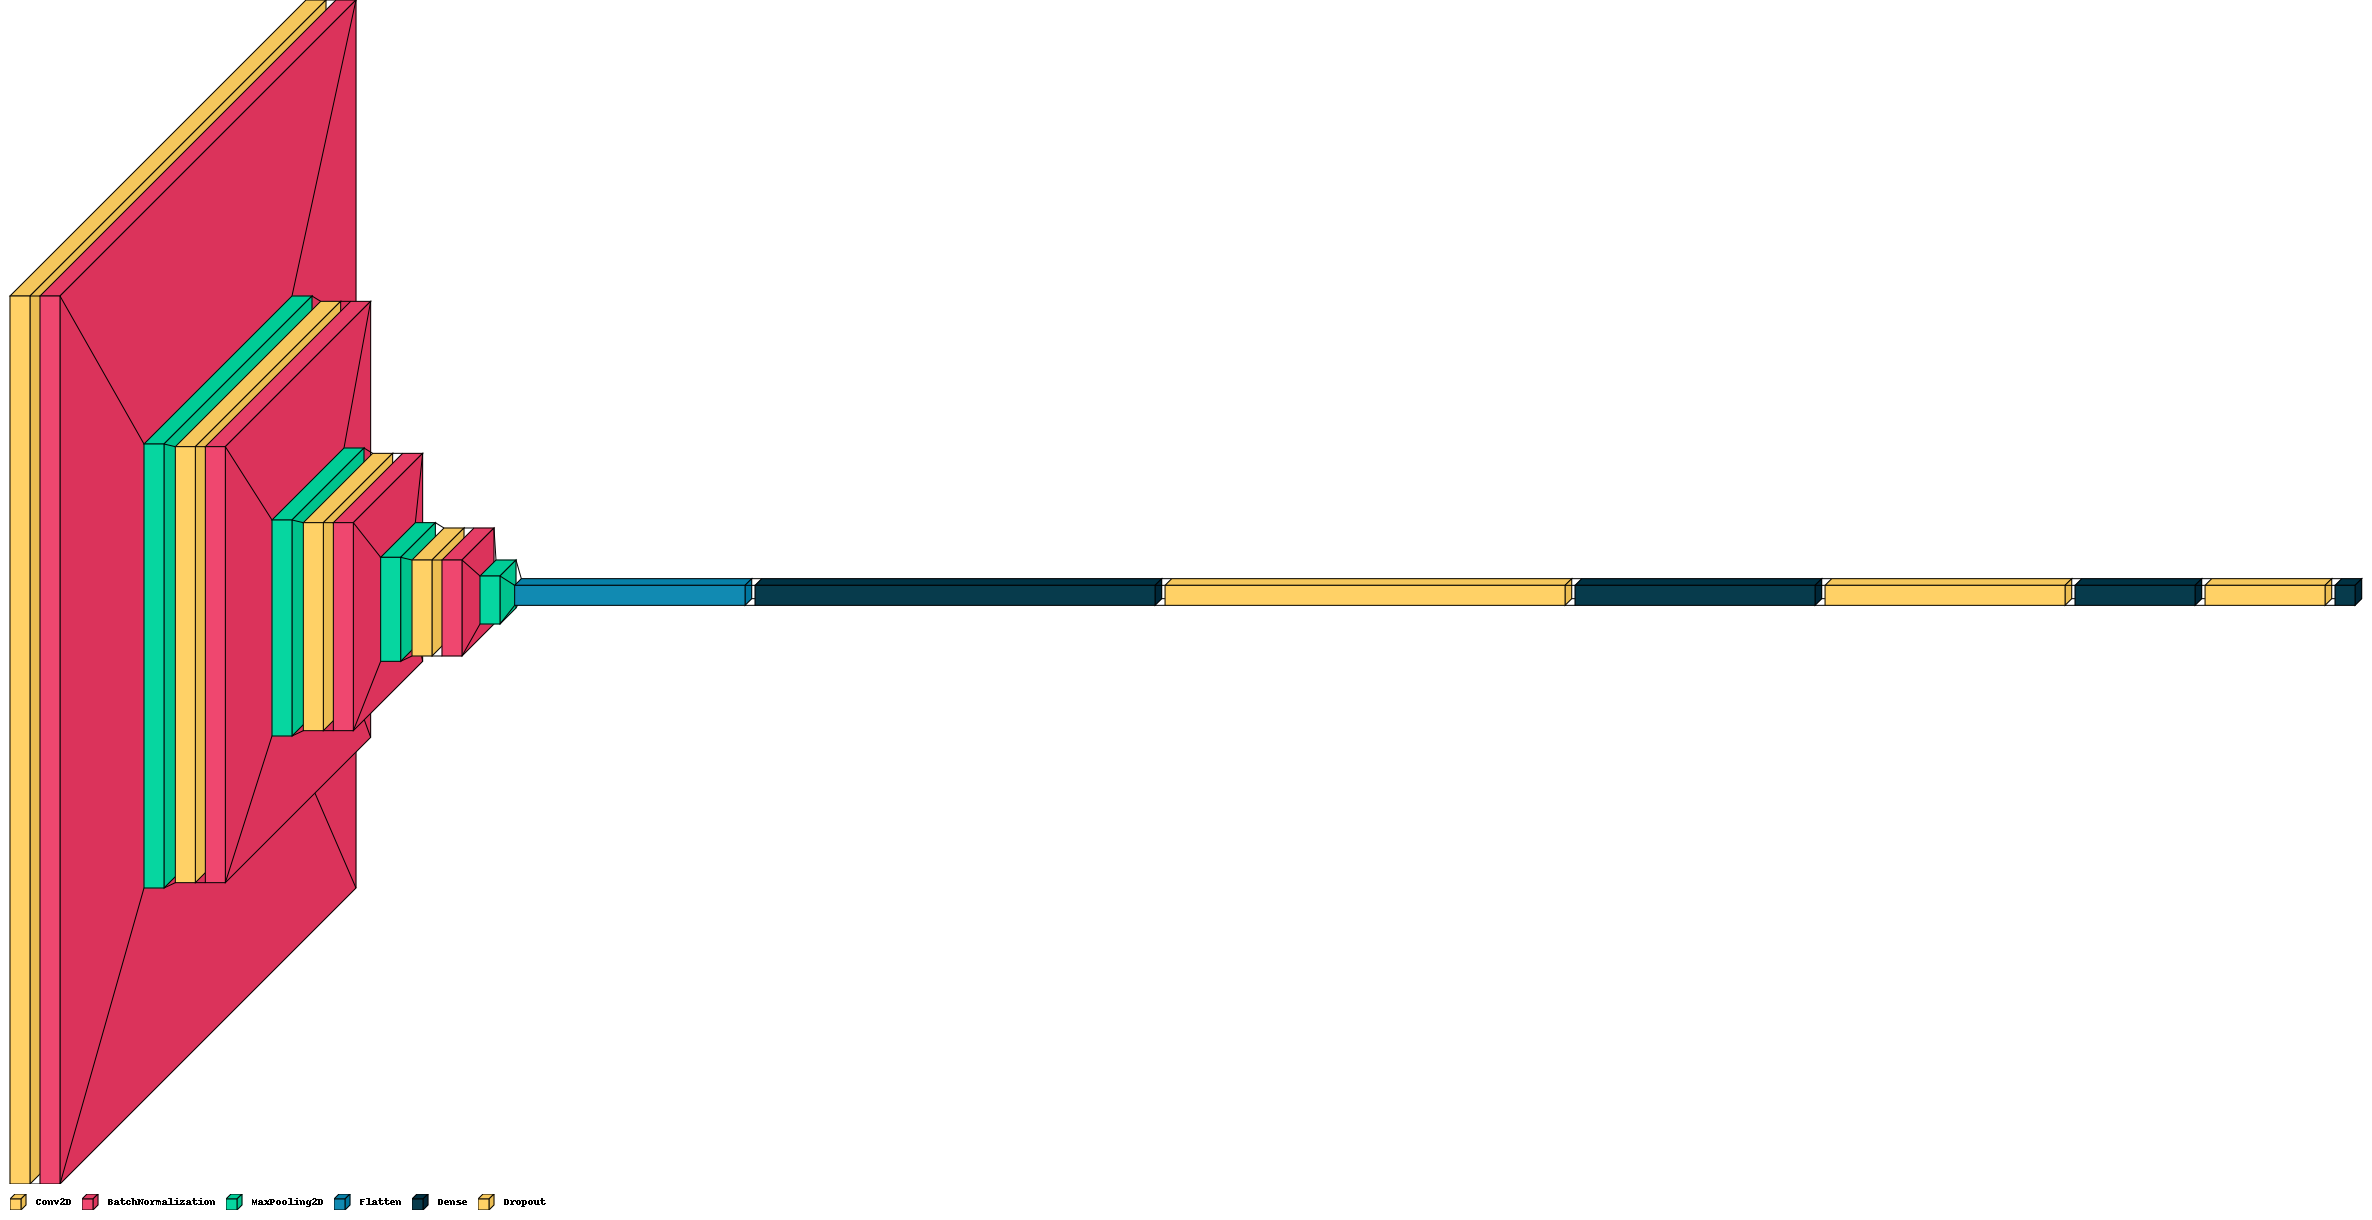

In [115]:
visualkeras.layered_view(model, legend=True) # without custom font

In [116]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [117]:
history = model.fit(train_data, steps_per_epoch=50, validation_data= test_data, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
50/50 [==============================] - 18s 282ms/step - loss: 2.3524 - accuracy: 0.5480 - val_loss: 3.8136 - val_accuracy: 0.4220
Epoch 2/100
50/50 [==============================] - 14s 277ms/step - loss: 0.6173 - accuracy: 0.7924 - val_loss: 0.5674 - val_accuracy: 0.7720
Epoch 3/100
50/50 [==============================] - 14s 282ms/step - loss: 0.3582 - accuracy: 0.8700 - val_loss: 0.5249 - val_accuracy: 0.7880
Epoch 4/100
50/50 [==============================] - 13s 260ms/step - loss: 0.2981 - accuracy: 0.9036 - val_loss: 0.7070 - val_accuracy: 0.7460
Epoch 5/100
50/50 [==============================] - 13s 260ms/step - loss: 0.2518 - accuracy: 0.9100 - val_loss: 0.3536 - val_accuracy: 0.8620
Epoch 6/100
50/50 [==============================] - 13s 268ms/step - loss: 0.1998 - accuracy: 0.9291 - val_loss: 0.3053 - val_accuracy: 0.8840


In [118]:
 model.save("animal_faces.h5")

In [120]:
from keras.models import load_model
trained_model = load_model("animal_faces.h5")

In [121]:
a=trained_model.evaluate(test_data)
score = trained_model.evaluate(test_data)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

30/30 [==============================] - 4s 97ms/step - loss: 0.2959 - accuracy: 0.8967
Test loss: 0.2958795428276062
Test accuracy: 0.8966666460037231
